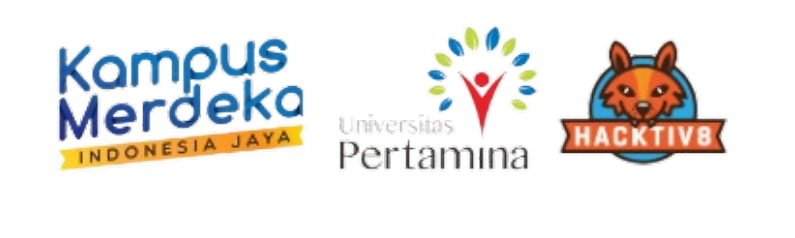

In [57]:
from PIL import Image
logo = np.array(Image.open('logo.png'))
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(logo,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

# Assignment 2
# Andreas Dimas Christanto 
# PYTN-KS08-017

# Project Overview
Pada project ke-2 ini menggunakan dataset dari kaggle, yaitu NYC Property Sales Dataset. Dataset ini berupa catatan dari setiap unit bangunan seperti apartment, dll yang terjual di pasar properti New York City selama periode 12 bulan. Dataset ini berisi:

- BOROUGH: Kode digit untuk wilayah tempat properti, seperti Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
- BLOCK: Kombinasi borough, block, dan lot membentuk kunci unik untuk properti di New York City. Biasa disebut BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: Jenis bangunan di berbagai titik waktu.

Perhatikan bahwa karena ini adalah kumpulan data transaksi keuangan, ada beberapa hal yang perlu diingat:

- Banyak penjualan terjadi dengan jumlah dolar yang sangat kecil: $0 paling umum. orang tua ini mentransfer kepemilikan ke rumah mereka kepada seorang anak setelah pindah untuk pensiun.
- Kumpulan data ini menggunakan definisi keuangan dari suatu -- bangunan/unit bangunan, untuk tujuan perpajakan. dalam hal satu entitas memiliki bangunan yang bersangkutan, penjualan mencakup nilai seluruh bangunan. dalam hal sebuah bangunan dimiliki sedikit demi sedikit oleh penghuninya (kondominium), penjualan mengacu pada satu apartemen (atau sekelompok apartemen) yang dimiliki oleh beberapa individu.

# Import Libraries


In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

# Data Preparation

In [2]:
#Membaca data
df = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
#Menampilkan 5 baris teratas pada data
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
#Menampilkan 5 baris terbawah pada data
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [5]:
#Melihat jumlah baris dan jumlah kolom (bentuk data) pada data df dengan fungsi .shape 
df.shape

(84548, 22)

In [6]:
#Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
#Mencari kolom pada data
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [8]:
#Mencari nilai unique pada data
for i in df.columns:
    print("\n", i)
    print(df[i].unique())


 Unnamed: 0
[    4     5     6 ... 26737 26738 26739]

 BOROUGH
[1 2 3 4 5]

 NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTONA PARK' 'EAST RIVER' 'EAST TREMONT'
 'FIELDSTON

['C2' 'C7' 'C4' 'D5' 'D9' 'D7' 'D1' 'C6' 'D0' 'D4' 'RR' 'R2' 'R4' 'S3'
 'S4' 'S5' 'R1' 'R8' 'R9' 'K4' 'M9' 'M3' 'RA' 'RK' 'RS' 'A9' 'A4' 'B3'
 'B1' 'S2' 'C0' 'R6' 'C5' 'C3' 'C1' 'D6' 'S9' 'O2' 'O1' 'O3' 'O5' 'O6'
 'K1' 'K2' 'L9' 'L8' 'L1' 'H1' 'H8' 'H3' 'R5' 'G9' 'G6' 'P7' 'M1' 'N2'
 'RB' 'RG' 'RT' 'K9' 'V1' 'GW' 'G2' 'I7' 'M4' 'Z9' 'B9' 'D3' 'I9' 'U6'
 'O4' 'L3' 'H2' 'E1' 'Z3' 'Q1' 'RW' 'C9' 'J5' 'N9' 'S1' 'A5' 'J8' 'B2'
 'C8' 'F5' 'G7' 'G5' 'G4' 'P2' 'Q9' 'Y1' 'RP' 'O8' 'HR' 'G1' 'E7' 'I5'
 'R3' 'I4' 'H9' 'RH' 'D8' 'HB' 'J4' 'W2' 'P9' 'A7' 'D2' 'S0' 'O7' 'O9'
 'W3' 'HS' 'H6' 'J9' 'R0' 'HH' 'W8' 'W6' 'A1' 'K5' 'F1' 'V9' 'A2' 'V0'
 'G0' 'F4' 'E9' 'I3' 'W4' 'V3' 'I1' 'A6' 'Q8' 'A3' 'Z0' 'W1' 'U1' 'F2'
 'F9' 'GU' 'I6' 'G8' 'P5' 'Y3' 'W9' 'M2' 'G3' 'V6' 'K7' 'K3' 'H4' 'R7'
 'P8' 'K6' 'V2' 'E2' 'Z2' 'T2' 'K8' 'P6' 'A0' 'J1' 'CM' 'Z7']

 SALE PRICE
['6625000' ' -  ' '3936272' ... '408092' '11693337' '69300']

 SALE DATE
['2017-07-19 00:00:00' '2016-12-14 00:00:00' '2016-12-09 00:00:00'
 '20

In [9]:
#Membuat variabel missing_values untuk menampung missing values
missing_values = ['na','--','NaN','NA','n/a','?',' ','n-a',' -  ']
df = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)

# Data Preprocessing


In [11]:
#Menghapus kolom Unnamed: 0 dan EASE-MENT
df.drop(["Unnamed: 0", "EASE-MENT"], axis=1, inplace=True)

In [12]:
#Mengubah tipe data SALE DATE ke datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [13]:
#Mengubah tipe data menjadi numeric
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
#Mengubah tipe data menjadi categorical
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 
               'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [15]:
#Mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                19052 non-null  object        
 9   ZIP CODE                        84548 non-null  category      
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [16]:
#Mengecek missing value
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [17]:
#Mengecek data duplikat
df.duplicated().sum()

765

In [18]:
#Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [19]:
#Menghapus kolom APARTMENT NUMBER karena berdasarkan data tidak diperlukan
df.drop(["APARTMENT NUMBER"], axis=1, inplace=True)

In [20]:
#Melihat skewness dari setiap kolom
df.skew(axis=0, skipna=True)

C:\Users\KRISMANTO\AppData\Local\Temp\ipykernel_5720\1019434457.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0, skipna=True)


BLOCK                  1.046322
LOT                    3.506785
RESIDENTIAL UNITS     62.058053
COMMERCIAL UNITS     224.990028
TOTAL UNITS           65.249327
LAND SQUARE FEET      75.762320
GROSS SQUARE FEET     61.121216
SALE PRICE           123.943132
dtype: float64

In [21]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [22]:
#Melakukan handling missing values
#Tipe data kategori
replace_mode = ['TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT']
for col1 in replace_mode:
    df[col1].fillna(df[col1].mode(), inplace=True)

#Tipe data numerik
df["LAND SQUARE FEET"]=df["LAND SQUARE FEET"].fillna(df["LAND SQUARE FEET"].median())
df["GROSS SQUARE FEET"]=df["GROSS SQUARE FEET"].fillna(df["GROSS SQUARE FEET"].median())
df["SALE PRICE"]=df["SALE PRICE"].fillna(df["SALE PRICE"].median())

In [23]:
#Mengecek kembali missing values
df.isna().sum()

BOROUGH                             0
NEIGHBORHOOD                        0
BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT              738
BLOCK                               0
LOT                                 0
BUILDING CLASS AT PRESENT         738
ADDRESS                             0
ZIP CODE                            0
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
YEAR BUILT                          0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
dtype: int64

In [24]:
#Menghapus data duplikat pada kolom YEAR BUILT
years = df["YEAR BUILT"].drop_duplicates()
years

0        1900
3        1913
6        1920
10       1910
11       2009
         ... 
33557    1871
39533    1893
44615    1865
45042    1882
81875    1680
Name: YEAR BUILT, Length: 158, dtype: category
Categories (158, int64): [0, 1111, 1680, 1800, ..., 2014, 2015, 2016, 2017]

In [25]:
#Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,8.378300e+04,8.378300e+04,8.378300e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.375438e+03,3.170620e+03,1.154192e+06
std,3568.789482,658.021286,16.569118,8.576582,18.777727,3.449485e+04,2.860114e+04,1.042234e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,3.000000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,2.650000e+03,2.080000e+03,8.350000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


In [26]:
#Menghitung nilai 0 pada kolom YEAR BUILT, TOTAL UNIT, SALE PRICE
print("Nilai 0 pada YEAR BUILT: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Nilai 0 pada TOTAL UNIT: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Nilai 0 pada SALE PRICE: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

Nilai 0 pada YEAR BUILT:  6885
Nilai 0 pada TOTAL UNIT:  19677
Nilai 0 pada SALE PRICE:  10012


In [27]:
#Menghapus nilai 0 pada kolom YEAR BUILT, TOTAL UNIT, SALE PRICE
df['YEAR BUILT'].replace(0, np.nan, inplace=True)
df['TOTAL UNITS'].replace(0, np.nan, inplace=True)
df['SALE PRICE'].replace(0, np.nan, inplace=True)

In [28]:
#Mengecek kembali nilai 0 pada kolom YEAR BUILT, TOTAL UNIT, SALE PRICE
print("Nilai 0 pada YEAR BUILT: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Nilai 0 pada TOTAL UNIT: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Nilai 0 pada SALE PRICE: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

Nilai 0 pada YEAR BUILT:  0
Nilai 0 pada TOTAL UNIT:  0
Nilai 0 pada SALE PRICE:  0


In [29]:
#Menghapus missing values
df.dropna(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51546 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         51546 non-null  category      
 1   NEIGHBORHOOD                    51546 non-null  category      
 2   BUILDING CLASS CATEGORY         51546 non-null  category      
 3   TAX CLASS AT PRESENT            51546 non-null  category      
 4   BLOCK                           51546 non-null  int64         
 5   LOT                             51546 non-null  int64         
 6   BUILDING CLASS AT PRESENT       51546 non-null  category      
 7   ADDRESS                         51546 non-null  object        
 8   ZIP CODE                        51546 non-null  category      
 9   RESIDENTIAL UNITS               51546 non-null  int64         
 10  COMMERCIAL UNITS                51546 non-null  int64         
 11  TO

C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


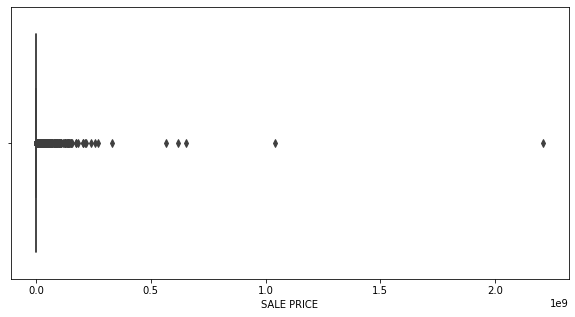

In [31]:
#Membuat boxplot untuk melihat outliers pada SALE PRICE
plt.figure(figsize=(10,5))
sns.boxplot(df["SALE PRICE"])
plt.show()

In [32]:
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 800000)]

C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


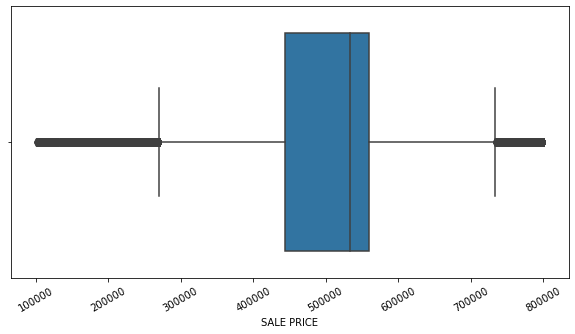

In [33]:
#Membuat boxplot untuk melihat outliers pada SALE PRICE
plt.figure(figsize=(10,5))
sns.boxplot(df["SALE PRICE"])
plt.xticks(rotation=30)
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33240 entries, 1 to 84545
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         33240 non-null  category      
 1   NEIGHBORHOOD                    33240 non-null  category      
 2   BUILDING CLASS CATEGORY         33240 non-null  category      
 3   TAX CLASS AT PRESENT            33240 non-null  category      
 4   BLOCK                           33240 non-null  int64         
 5   LOT                             33240 non-null  int64         
 6   BUILDING CLASS AT PRESENT       33240 non-null  category      
 7   ADDRESS                         33240 non-null  object        
 8   ZIP CODE                        33240 non-null  category      
 9   RESIDENTIAL UNITS               33240 non-null  int64         
 10  COMMERCIAL UNITS                33240 non-null  int64         
 11  TO

In [35]:
#Melakukan encode pada kolom BOROUGH
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31.0,4616.0,18690.0,1900,2,C7,533000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17.0,2212.0,7803.0,1900,2,C7,533000.0,2016-12-09
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,10009,20,0,20.0,2581.0,9730.0,1900,2,C4,533000.0,2017-07-20
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,10009,44,2,46.0,5163.0,21007.0,1900,2,C7,533000.0,2017-07-20
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,10009,15,0,15.0,1534.0,9198.0,1920,2,D5,533000.0,2017-06-20


# Exploratory Data Analysis
#### Measure of Central Tendency
#### Mean

In [36]:
#Menghitung nilai mean SALE PRICE pada setiap data di kolom BOROUGH
mean_price = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True)
mean_price

,SALE PRICE
BOROUGH,
Bronx,454719.496226
Staten Island,479749.732431
Queens,518863.461569
Brooklyn,531021.716746
Manhattan,551868.071038


In [37]:
#Menghitung nilai mean pada setiap data di kolom BOROUGH
mean_all = df.groupby('BOROUGH').mean()
mean_all

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,1162.025715,1046.780135,5.309225,0.945034,6.371906,2941.598843,8586.459981,551868.071038
Bronx,4229.494257,118.194289,2.068592,0.046275,2.114539,2620.252379,2278.153922,454719.496226
Brooklyn,5154.577713,371.171405,1.754513,0.058726,1.822992,1981.770284,1704.962440,531021.716746
Queens,7722.878476,229.919006,2.207634,0.225866,2.466881,3921.786136,2888.354014,518863.461569
Staten Island,3261.245902,215.497933,1.288952,0.058731,1.350677,4296.569779,1872.173913,479749.732431


# Kesimpulan:

Dari tabel di atas, Manhattan memiliki rata - rata tertinggi hampir disemua kolom. Meskipun begitu, Queens menjadi urutan pertama dengan rata - rata tertinggi di kolom BLOCK dan State Island menjadi urutan pertama dengan rata - rata tertinggi di kolom LAND SQUARE FEET.

# Median

In [38]:
#Menghitung nilai median SALE PRICE pada setiap data di kolom BOROUGH
median_price = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=True)
median_price

,SALE PRICE
BOROUGH,
Bronx,450000.0
Manhattan,533000.0
Queens,533000.0
Staten Island,533000.0
Brooklyn,550000.0


# Kesimpulan:

Dari tabel di atas, dapat diketahui bahwa median tertinggi terdapat pada kota Brooklyn, yaitu 550000 dan median terendah terdapat pada kota Bronx.

# Modus

In [39]:
#Menghitung nilai modus TOTAL UNIT pada setiap data di kolom BOROUGH
modus_price = df[['BOROUGH','TOTAL UNITS']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
modus_price

,BOROUGH,TOTAL UNITS
0,Manhattan,1.0
1,Bronx,2.0
2,Brooklyn,1.0
3,Queens,1.0
4,Staten Island,1.0


# Kesimpulan:

Dari tabel di atas, Bronx memiliki sebagian besar 2 total unit, sedangkan borough lainnya sebagian besar memiliki 1 total unit.

# Measure of Spread
# Range

In [40]:
#Menghitung nilai range SALE PRICE pada setiap data di kolom BOROUGH
range_price = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
range_price

BOROUGH
Manhattan        691680.0
Bronx            697500.0
Brooklyn         698326.0
Queens           698634.0
Staten Island    698300.0
dtype: float64

# Kesimpulan:

Dari tabel di atas, dapat diketahui bahwa nilai range pada semua kota tidak jauh berbeda, yaitu masih di angka 690000.and

# Variance

In [41]:
#Menghitung nilai variance pada setiap data di kolom BOROUGH
var_all = df.groupby('BOROUGH').var()
var_all

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,3.142175e+05,717910.228171,1350.462548,168.305338,1529.207301,5.069350e+07,3.318655e+09,6.686725e+09
Bronx,8.998643e+05,70474.574189,73.524841,0.072382,73.509857,8.828127e+06,5.613665e+07,2.292858e+10
Brooklyn,6.275066e+06,291303.238775,42.074012,0.124197,42.154008,2.533582e+08,7.328386e+07,2.853781e+10
Queens,1.970488e+07,227306.659603,550.275505,335.528177,895.808833,2.417852e+09,1.953598e+09,1.558957e+10
Staten Island,5.119743e+06,204110.845412,3.765226,2.375221,6.028134,7.767154e+08,7.213998e+07,1.781652e+10


# Kesimpulan:

Dari tabel di atas, dapat diketahui bahwa sebagian besar kota memiliki nilai varians yang tinggi, artinya data memiliki distribusi yang besar.

# Standard Deviation

In [42]:
#Menghitung nilai standar deviasi pada setiap data di kolom BOROUGH
std_all = df.groupby('BOROUGH').std()
std_all

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,560.551027,847.295833,36.748640,12.973255,39.105080,7119.937134,57607.771999,81772.396199
Bronx,948.611759,265.470477,8.574663,0.269039,8.573789,2971.216482,7492.439587,151421.869236
Brooklyn,2505.008121,539.725151,6.486448,0.352416,6.492612,15917.228446,8560.599356,168931.371636
Queens,4439.017348,476.766882,23.457952,18.317428,29.930066,49171.654954,44199.529479,124858.189065
Staten Island,2262.684895,451.786283,1.940419,1.541175,2.455226,27869.614505,8493.525502,133478.522279


# Kesimpulan:

Dari tabel di atas, dapat diketahui bahwa sebagian besar kota memiliki nilai standar deviasi yang tinggi, artinya data memiliki distribusi yang besar

# Probability Distribution

C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Probability of Occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Brooklyn')]

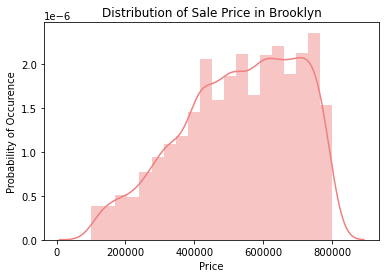

In [43]:
#Membuat probability distribution Bronx di kolom SALE PRICE 
df1 = df.groupby("BOROUGH")
br = df1.get_group('Brooklyn')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=20,
                  color='lightcoral',
                  hist_kws={"linewidth": 15,'alpha':0.45})

ax.set(xlabel='Price', 
       ylabel='Probability of Occurence', 
       title='Distribution of Sale Price in Brooklyn')

# Kesimpulan:

Dari plot distribusi di atas, dapat diketahui bahwa SALE PRICE Brooklyn condong ke kiri. Artinya, nilai - nilai observasi berfrekuensi rendah lebih banyak berada di sebelah kiri dari r# ta - rata.

C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Probability of Occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Bronx')]

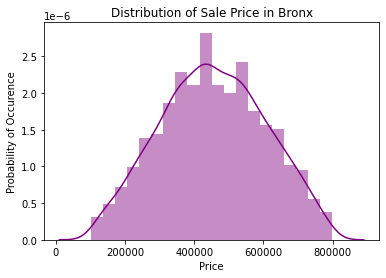

In [44]:
#Membuat probability distribution Bronx di kolom SALE PRICE 
df1 = df.groupby("BOROUGH")
br = df1.get_group('Bronx')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=20,
                  color='purple',
                  hist_kws={"linewidth": 15,'alpha':0.45})

ax.set(xlabel='Price', 
       ylabel='Probability of Occurence', 
       title='Distribution of Sale Price in Bronx')

# Kesimpulan:

Dari plot distribusi di atas, dapat diketahui bahwa SALE PRICE Bronx mengikuti distribusi normal.

# Confidence Interval

In [45]:
#Menampilkan mean, standard deviation, dan population size dari SALE PRICE
ci=df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
ci

SALE PRICE                      
                        mean            std   size
BOROUGH                                           
Manhattan      551868.071038   81772.396199   3111
Bronx          454719.496226  151421.869236   3047
Brooklyn       531021.716746  168931.371636   4819
Queens         518863.461569  124858.189065  15248
Staten Island  479749.732431  133478.522279   7015

In [46]:
#Mengekstrak parameter yang diperlukan
mean_sp = ci.iloc[0,0]
sd = ci.iloc [0,1]
n = ci.iloc [0,2]         
z = 1.96    

In [47]:
#Menghitung standard error menggunakan formula untuk standard error dari mean
se = sd / np.sqrt(n)

In [48]:
#Membangun CI
lcb = mean_sp - z * se
ucb = mean_sp + z * se
lcb, ucb

(548994.5605278267, 554741.5815486761)

Artinya rata-rata sebenarnya dari SALE PRICE di Manhattan akan jatuh antara 548994.5605278267 dan 554741.5815486761

# Hypothesis Testing
Bagian ini mencantumkan uji statistik yang dapat digunakan untuk memeriksa apakah data tersebut memiliki distribusi Gaussian.

Menguji apakah sampel data memiliki distribusi Gaussian.

Asumsi

- Pengamatan di setiap sampel independen dan terdistribusi secara identik.
Interpretasi

- H0: Sampel memiliki distribusi Gaussian
- H1: Sampel tidak memiliki distribusi Gaussian
# Shapiro-Wilk Test

In [49]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
mh = df1.get_group('Manhattan')
sp = mh['SALE PRICE']

from scipy.stats import shapiro
stat, p = shapiro(sp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.629, p=0.000
Probably not Gaussian


# D'Agostino's K^2 Test

In [50]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
br = df1.get_group('Bronx')
sp1 = br['SALE PRICE']

from scipy.stats import normaltest
stat, p = normaltest(sp1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=124.810, p=0.000
Probably not Gaussian


# Anderson-Darling Test

In [51]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
brok = df1.get_group('Brooklyn')
sp2 = brok['SALE PRICE']

from scipy.stats import anderson
results = anderson(sp2)
print('stat=%.3f' % (results.statistic))
for i in range(len(results.critical_values)):
      sl, cv = results.significance_level[i], results.critical_values[i]
      if results.statistic < cv:
          print('Probably Gaussian at the %.1f%% level' % (sl))
      else:
          print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=39.849
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


### Kesimpulan: Didapatkan p-value < 0,05 sehingga H0 ditolak yang berarti sampel tidak berdistribusi Gaussian.

# Kesimpulan
1. Rata - rata tertinggi terdapat pada Manhattan, yaitu 551868.
2. Median tertinggi terdapat pada kota Brooklyn, yaitu 550000 dan median terendah terdapat pada kota Bronx.
3. Bronx memiliki sebagian besar 2 total unit, sedangkan borough lainnya sebagian besar memiliki 1 total unit.
4. Range pada semua kota tidak jauh berbeda, yaitu masih di angka 690000.
5. Sebagian besar kota memiliki nilai varians yang tinggi, artinya data memiliki distribusi yang besar.
6. Berdasarkan pengujian hipotesis, didapatkan p-value < 0.05 sehingga sampel tidak berdistribusi Gaussian.